# 特征学习与卷积神经网络

1. 思路：
    - 输入一张图
    - 进行n个卷积运算
    - 得到n个特征图
    - 进行m个卷积运算
    - 得到m个特征图
    - ....
    - 得到l个特征图
        - 特征图浓缩为一个特征值（特征向量）

2. 数学函数来表示
    - 假设图像$X$
    - 多个多层卷积计算黑盒为一个函数$f(X) = y = [x_0, x_1, \dots, x_9]$

3. 把数组的类别表示为
    - $0 \to [1, 0, 0 , \dots , 0]$
    - $1 \to [0, 1, 0 , \dots , 0]$
    - $2 \to [0, 0, 1 , \dots , 0]$
    - $\dots$
    - $9 \to [0, 0, 0 , \dots , 1]$

4. 运行的结果
    - $[x_0, x_1, \dots , x_9]$ = 判定最大下标

5. 逻辑回归
    - sigmod：导数使用函数本身表示
    - softmax：

6. 为了加速卷积计算结果的特征图维度降低
    - 引入一个运算：池化pool_max/avg运算：
        - $n \times n$区域变成一个像素
            - 均值
            - 最值（优选）

7. 卷积中会出现负数
    - 激活函数
        - 过滤负数值（过滤不重要的负面的值）
            - $f(x) = x$
                - 单调递增
                - 可导
                - 0在附近必须接近$f(x)=x$

8. 怎么学习
    - 没有学习的模型输出的预测与真是图像的类型存在误差。
        - 误差的数学模型怎么建立
            - 损失函数（均方差损失/交叉熵损失/......）


- $f(k_1, k_2, \dots, k_{144}) = y_{pred}$

- $loss = \epsilon(y_{pred} - y)$

- 求损失函数最小的参数$k_1, k_2, \dots, k_{144}$

- 求函数的最小值的算法：
    1. 最小二乘法
    2. 坐标法
    3. 牛顿迭代
    4. 梯度下降法

# 神经网络的实现技术

## 实现一个运算

- Lenet-5网络
    - 输入一副图像
    - 结果得到10长的向量

- 总结：
    - 卷积神经网络：
        - 阶段1：抽取图像的特征
        - 阶段2：把特征图像格式化成向量，使用分类器分类

## 手写数字数据集

In [1]:
import torch.nn as nn
import torch.nn.functional as fu
import torchvision
from  torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor
from torch.utils.data import DataLoader
transform = Compose([ToTensor(), ])  # 图像的预处理
# 2. 加载数据集
train_mnist = MNIST(root="datasets", train=True, download=True, transform=transform)
valid_mnist = MNIST(root="datasets", train=False, download=True, transform=transform)
print(type(train_mnist))

Extracting datasets\MNIST\raw\train-images-idx3-ubyte.gz to datasets\MNIST\raw


Extracting datasets\MNIST\raw\train-labels-idx1-ubyte.gz to datasets\MNIST\raw



Extracting datasets\MNIST\raw\t10k-images-idx3-ubyte.gz to datasets\MNIST\raw


Extracting datasets\MNIST\raw\t10k-labels-idx1-ubyte.gz to datasets\MNIST\raw
Processing...
Done!
<class 'torchvision.datasets.mnist.MNIST'>


In [2]:
help(MNIST)

Help on class MNIST in module torchvision.datasets.mnist:

class MNIST(torchvision.datasets.vision.VisionDataset)
 |  `MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.
 |  
 |  Args:
 |      root (string): Root directory of dataset where ``MNIST/processed/training.pt``
 |          and  ``MNIST/processed/test.pt`` exist.
 |      train (bool, optional): If True, creates dataset from ``training.pt``,
 |          otherwise from ``test.pt``.
 |      download (bool, optional): If true, downloads the dataset from the internet and
 |          puts it in root directory. If dataset is already downloaded, it is not
 |          downloaded again.
 |      transform (callable, optional): A function/transform that  takes in an PIL image
 |          and returns a transformed version. E.g, ``transforms.RandomCrop``
 |      target_transform (callable, optional): A function/transform that takes in the
 |          target and transforms it.
 |  
 |  Method resolution order:
 |      MNIST
 |      torchvi

## 把二进制的手写图像数据集保存为图像

- 注意：
    - PyTorch的张量Tensor保存转换为numpy的矩阵，然后使用opencv保存位图像。
    - pytorch表示的图像：归一化的处理（0-1）
        - `*255`
        - 转换为uint8
        - 保存

## 自动求导与梯度下降

1. 传统的最小值的梯度下降法
    - $f(x) = x^2 - 2x + 1 = {(x-1)}^2$

1.0006655721560884


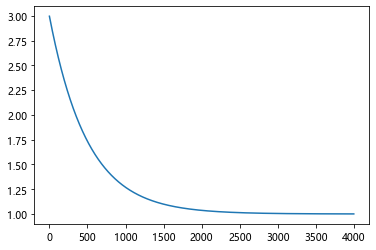

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 条件
x = 3
grad_fn = lambda x: 2 * x -2

epoch = 4000
learning_rate = 0.001

# 记录的数据
x_list =[]

for e in range(epoch):
    # 计算导数
    x_grad = grad_fn(x)
    # 更新x
    x -= x_grad * learning_rate
    # 记录x
    x_list.append(x)

# 打印的结果：
print(x)
plt.plot(range(epoch), x_list)
plt.show()


2. Pytorch自动求导的编程API

In [10]:
import torch
# 定义一个张量
x = torch.Tensor([5])
# 开关条件
x.requires_grad = True
# 进行计算
y = x ** 2

# 求导
y.backward()

# 获取x的导数
print(x.grad)

tensor([10.])


tensor([0.9997], requires_grad=True)


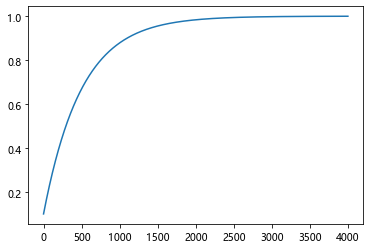

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
# 条件
learning_rate = 0.001
epoch = 4000
x = torch.Tensor([0.1])
x.requires_grad = True
x_list = []
for e in range(epoch):
    y = x ** 2 - 2 *x + 1
    y.backward(retain_graph=True)
    
    # 更新x
    with torch.autograd.no_grad():
        x -= learning_rate * x.grad
        x_list.append(x.detach().clone().numpy())
        x.grad.zero_()
    
print(x)    
plt.plot(range(epoch), x_list)
plt.show()

3. 卷积神经使用梯度下降来实现预测误差最小

# 手写数字识别程序

# 附录

## 作业

1. 用上课的代码，跑通训练；

2. 训练完整运行体验；
    - 改参数：轮数，学习率
    - 批次
    - 使用python记录训练前开始的时刻，以及训练后的时刻，计算出训练轮次的时间

3. 自己仿照我们的程序，使用我或者你们自己训练出来的模型，对图像进行识别。

- 提示：
    - 每个人提交到自己git仓库。